## Stock Sentiment Analysis using News Headlines

The Data set in consideration is a combination of the world news and stockprice shifts available in Kaggle

- There ae 25 columns of top news headlines for each day in the data frame.

- Data Ranges from 2008 to 2026 and the data from 2000 to 2008 was scrapped from yahoo finance.

- Labels are based on the Dow Jones industrial Average stock index.

- Class 1 --> the stock price increased
- Class 0 --> The stock price stayed the same or decreased

In [2]:
# importing libraries

import pandas as pd # data manipulation
import numpy as np # linear algebra

df = pd.read_csv('Data.csv',encoding= 'ISO-8859-1')
df.sample(5)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
2869,2011-08-10,0,This why they're rioting. An interview with Da...,"As looters and rioters smashed up shops, loote...",Facebook to Die on Novemeber 5th? Anonymous says,The YouTube man who was mugged by rioters pret...,Al Jazeera English has quashed several planned...,"Drug dealers may have wiped out ""uncontacted"" ...","London Riots: 'Bleeding, I Called 999. A Tired...",S. Korea opens fire after North artillery shel...,...,"Not just London. In Birmingham, 3 Men - though...","'Cameron has lost legitimacy, should go,' Liby...",UK Riots 2011: Tariq Jahan (Murdered Son's dad...,Iran Vows to Unplug Internet: Iran will begin ...,China's aircraft carrier leaves shipyard for f...,British rioters the spawn of a bankrupt ruling...,Shouldn't we Applaud the British government fo...,Speigel: How Obama disappointed the World,Syria expands offensive near Turkey border: Ta...,Water cannons now in effect for London riots
2110,2008-08-06,1,Cricket: Kevin Pietersen is looking to build p...,"Guangdong Acrobatic Troupe, Royal Opera House,...",Live-blogging the Forest Fringe: can it really...,Westwood in the mood to make point in the mino...,Edinburgh festival podcast: The Guardian Live ...,Tim Radford on the Cern's particle accelerator...,Historian Alex von Tunzelmann on The Other Bol...,Fashion diary: Beyonce's little sister,...,Editorial: Political games,Edinburgh festival: Dancers at the zoo,Steven Klein's best shot,Clashes in Bolivia halt talks before Morales r...,Mugabe and Tsvangirai to discuss powersharing,Paradise and razor wire: luxury resort helps H...,Business news in brief,"My Edinburgh: Jill Halfpenny, actor",Insurance: Standard Life profits up 51% after ...,"The green room: Arthur Potts-Dawson, ethical chef"
2590,2010-07-02,0,Sweden ends compulsory military service,Mexican gang gunfight near US border leaves 21...,Is Canadian Copyright Minister An Agent of For...,"On March 21, 2010, the Syrian security forces ...",Canadian copyright astroturf site revealed as ...,How Long Does it take for the Average Chinese ...,How an MI5 'weapons dealer' tricked a Real IRA...,This is the story of how some of the richest p...,...,Germany's left has its own tales of abuse. One...,FIFA may ban Nigeria from world football becau...,Many moons ago Rhodesia was having problems wi...,Pakistan Mosque Suicide Bombers caught on CCTV...,Two suicide bombers have carried out a deadly ...,The Glittering Prizes: War Crime Continues to ...,New tax doubles price of tobacco in Egypt,"UN report calls for world to ditch dollar, mig...","Hamas, a threat to its own people",Russia set for drink-driving ban
2020,2008-03-31,0,Cricket: Haroon Lorgat set to be next ICC chie...,Banker turns policeman to overhaul US financia...,Couple return to home destroyed in crash,Cycling: Cycling turns to formula one to gain ...,Nomadic bedouin fight to survive in the villag...,"No evidence Diana killed by MI6, coroner tells...",Formula one: Scheckter says Mosley must go,"Northern Rock under fire for chief's £760,000 ...",...,Football: The one-time league of stars now fac...,Champions League: Cech recovery checked so Cud...,Richard Williams: Owners may come and go but L...,Football: Best's crown intact until Ronaldo cu...,Demands for crackdown on biofuels scam,M&S failing to mollify shareholders over Rose'...,Letters: NUS review will make things worse,Supreme court threatens Islamic party's govern...,McCain admits he was caught off guard by Basra...,Burma draft constitution bars Suu Kyi
802,2003-05-08,0,Leicester slash wage bill,Bergkamp faces video charge,O'Leary ruled out as Leeds line up shortlist o...,Master Elleray gets his cards,Israel ready to reopen Syria peace talks,ECB predicts eurozone recovery,Emap down across board,Murdoch plans Sky for America,...,Analysts divided over rates decision,Shaping a sentence that spells success,Ward reunites with Murphy in Friends s

In [39]:
train = df[df['Date']< '20150101']
test = df[df['Date'] > '20141231']

In [40]:
train.shape,test.shape,df.shape

((3975, 27), (378, 27), (4101, 27))

In [41]:
data = train.drop(['Date','Label'],axis=1)
data.replace("[^a-zA-Z]"," ",regex=True,inplace=True)

#Renaming column names for ease of access
list1 = [i for i in range(1,26)]
new_index = [str(i) for i in list1]
data.columns = new_index
data.sample(5)

,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
3326,mr erdogan has intimidated the media into self...,turkish prime minister recep tayyip erdogan ha...,church of england gives up fight against gay m...,turkish protests are about democracy not reli...,year old paris student left brain dead afte...,girl gang raped in pakistan dares to fight fo...,pope francis says wasting food is like stealin...,israeli judge resigns after commenting some gi...,un countries that engage in bulk warrantless...,turkish police arrest people for using soci...,...,north and south korea agree to first dialogue ...,spanish mps abolish subsidised alcoholic drink...,in nigeria they are killing people without as...,german high court supports equal tax privilege...,brilliant spanish town mailing un scooped poo...,fake farm concealed underground grow op in lan...,turkish trade unions join protests against pm ...,iran bans dog walking in public and warn anima...,police slash ankles and arms of more than m...,a mouse sized fossil from china has provided r...
520,intel has launched its first,caddick casts cloud over win,blair goes in to bat for crawley,mckenna treads board and freezes,interview robin cousins,medals table,google in a box to,downhill salzburg policeman steals the show,spend on sport and save on health and crime,davis cup weekend round up,...,rose flowers,northampton sale,leeds newcastle,gloucester london irish,saracens leicester,wasps bristol,bath harlequins,women s football,scottish round up,first division round up
150,farewell home sweet home,rules of engagement,food tom s graves on bread and olive oil the...,leader the barclays woolwich merger,brierley opens campaign against ix marriage,pop review more awful repeats,dance review motion to mesmerise,proms review pieces of america,barclays ties up merger,wall street attacks disclosure rule,...,nimes rage over arsenal abduction,european round up,bradford bet on carbone,scoreboard,scoreboard,trescothick weighs in before rush of run outs,round up,lung cancer deaths halved,memories of the invincibles and six sixes,nasty nick investigated over secret phone claim
2411,b more than israeli students have announced...,b canadian trucker fined for smoking in the wo...,b moscow to ban snow this winter moscow mayo...,b fascism joins the st century british nati...,b new zealand moves towards becoming a police ...,b israeli member of paliament deporting fore...,b israel gets angry when this happens on tv se...,b iranian bloggers and tweeters iran s suprem...,b between and medical researchers r...,b ayatollah khamenei in coma says michael le...,...,b pakistan continues to destabilize today th...,b former australian foreign minister alexander...,b uk mp bills in expenses to his own...,b to try and show faith and science are compat...,b german intelligence agency warns of iranian ...,b bands of militants and suicide bombers hit ...,b multiple attacks on federal buildings in lah...,b for the first time in australian legal histo...,b it is unacceptable in the st century that ...,b it is impossible for any city in the world t...
92,wenger s legion equipped to win in style,danish police go on charm offensive,player by player guide to galatasaray v arsenal,henry the red hot marksman,second best not an option for wenger,off the rails,inflation at lowest since records began,the eternal immobility,tech stocks pound perpetual,brief encounters an employment tribunal lawye...,...,london sinfonietta peter eotvos,surly thorpe told he still has a future,bumble s england of rebels in the wrong trousers,six players fighting for three final places,at the very foot of buddha stands his poshness...,popescu dreams of repeat,danish police on red alert,the squad,fowler put on finals footing,the man who makes zimbabwe tremble


In [42]:
data.columns

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25'],
      dtype='object')

In [43]:
# converting all the texts to lowercase
for x in data.columns:
  data[x] = data[x].astype(str)
  data[x] = data[x].str.lower()
data.head(1)

,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
0,a hindrance to operations extracts from the...,scorecard,hughes instant hit buoys blues,jack gets his skates on at ice cold alex,chaos as maracana builds up for united,depleted leicester prevail as elliott spoils e...,hungry spurs sense rich pickings,gunners so wide of an easy target,derby raise a glass to strupar s debut double,southgate strikes leeds pay the penalty,...,flintoff injury piles on woe for england,hunters threaten jospin with new battle of the...,kohl s successor drawn into scandal,the difference between men and women,sara denver nurse turned solicitor,diana s landmine crusade put tories in a panic,yeltsin s resignation caught opposition flat f...,russian roulette,sold out,recovering a title


In [48]:
' '.join(str(x) for x in data.iloc[0,0:25])

'a  hindrance to operations   extracts from the leaked reports scorecard hughes  instant hit buoys blues jack gets his skates on at ice cold alex chaos as maracana builds up for united depleted leicester prevail as elliott spoils everton s party hungry spurs sense rich pickings gunners so wide of an easy target derby raise a glass to strupar s debut double southgate strikes  leeds pay the penalty hammers hand robson a youthful lesson saints party like it s      wear wolves have turned into lambs stump mike catches testy gough s taunt langer escapes to hit     flintoff injury piles on woe for england hunters threaten jospin with new battle of the somme kohl s successor drawn into scandal the difference between men and women sara denver  nurse turned solicitor diana s landmine crusade put tories in a panic yeltsin s resignation caught opposition flat footed russian roulette sold out recovering a title'

In [50]:
headlines = []
for row in range(0,len(data.index)):
  headlines.append(' '.join(str(x) for x in data.iloc[row,0:25]))

In [52]:
headlines[0]

'a  hindrance to operations   extracts from the leaked reports scorecard hughes  instant hit buoys blues jack gets his skates on at ice cold alex chaos as maracana builds up for united depleted leicester prevail as elliott spoils everton s party hungry spurs sense rich pickings gunners so wide of an easy target derby raise a glass to strupar s debut double southgate strikes  leeds pay the penalty hammers hand robson a youthful lesson saints party like it s      wear wolves have turned into lambs stump mike catches testy gough s taunt langer escapes to hit     flintoff injury piles on woe for england hunters threaten jospin with new battle of the somme kohl s successor drawn into scandal the difference between men and women sara denver  nurse turned solicitor diana s landmine crusade put tories in a panic yeltsin s resignation caught opposition flat footed russian roulette sold out recovering a title'

In [62]:
# Implementing bag of words
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(2,2))
train_df = cv.fit_transform(headlines)

In [63]:
train['Label'].values

array(['0', '0', '0', ..., '1', '0', '0'], dtype=object)

In [64]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=200,criterion='entropy')
rf_clf.fit(train_df,train['Label'])


RandomForestClassifier(criterion='entropy', n_estimators=200)

In [65]:
test.sample(5)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
4092,2016-06-21,1,an australian athlete who has competed in six ...,russian state television accidentally broadcas...,"in 2015, 50 environmentalists were killed in b...",china's plan to cut meat consumption by 50% ch...,coral bleaching event now biggest in history ...,super-rich quaff champagne in venezuela countr...,hong kong bookseller refuses to be silenced af...,chinese prosecutors have successfully sued a c...,...,turkey charges reporters without borders press...,brussels: bomb alert at shopping centre sparks...,australian paralympian liesl tesch robbed at g...,china issues orders to demolish buddhist 'town...,gazans squeezed by triple taxes as hamas repla...,us and russian fighters in dramatic showdown o...,rising tide of 'politically acceptable' killin...,mexico teachers protest: six people are dead a...,canada is set to launch a paid whistleblower p...,russian football fan leader alexander shprygin...
3805,2015-05-01,1,"new test suggests nasa's ""impossible"" em drive...",china announces plan to seven-fold increase an...,10-year-old girl raped by stepfather is refuse...,north korean diplomats storm out of un rights ...,u.s. navy warships will now accompany every u....,its official: rubella has been eradicated from...,schools in japan to let transgender students u...,traumatically brainwashed boko haram captives ...,...,biggest anti-government protest in maldivian h...,pakistan must allow afghanistan direct access ...,cia-backed rebels fight alongside al-qaeda win...,"canada's leader, stephen harper, will not be a...",un report: iran arming houthis since 2009,airbus to file complaint in germany over alleg...,"the leader of the islamic state (isis), abu ba...",australian foreign minister julie bishop says ...,hundreds of students seek refuge outside u.s. ...,"in iran, fatal porsche crash unleashes middle-..."
3862,2015-07-23,0,dolphins are struggling to reproduce because o...,"tibet monk dies in custody, china cremates him...",white house finalizing plan to close guantanam...,spain raises marrying age from 14 to 16,european union opens antitrust case against 6 ...,"australia's climate change stance is ""incompre...",the canadian government says it will not be bu...,china starts building its largest solar plant:...,...,thirty-seven people were killed in three days ...,ukraine: thousands of far-right supporters ral...,the brics countries just launched a rival to t...,seventy years after the end of the second worl...,the united nations office in guatemala said tu...,chile's salmon farmers are using record levels...,tehran turns down berlins request to recognize...,"india, china and iraq become biggest russian w...",rushdie says 'wrong lessons' learned from his ...,earth records hottest june since records began
3939,2015-11-10,1,belgium tells facebook to stop storing data fr...,indonesia is planning to build a prison island...,turkey's only atheist group launches petition ...,"helmut schmidt, former west german chancellor,...",former calgary judge investigated for comments...,chevron australia's us parent company paid inc...,a moroccan actor who starred in a controversia...,china recently conducted a flight test of a ne...,...,sicily police arrest convicted terrorist ben n...,karzai calls al-qaida a 'myth' and denies 9/11...,china decries shenyang pollution called 'worst...,toxic fumes from the indonesian fires have spr...,myanmar ruling party concedes defeat as suu ky...,china's dirty air just hit 'doomsday' levels |...,more misery ahead for greeks as economy set to...,"israel: netanyahu government approves 2,200 ne...",6 ethiopians burned to death in latest south a...,uk surveillance bill could bring 'very dire co...
3865,2015-07-28,1,american dentist named as the hunter that kill...,billionaire hedge fund managers have called on...,u.s. drops bid for 2024 olympics in boston,"porn websites visited 250,000 tim

In [66]:
# predict for the test dataset
test_transform = []
for row in range(len(test.index)):
  test_transform.append(' '.join(str(x) for x in test.iloc[row,2:27]))
test_df = cv.transform(test_transform)
y_pred  = rf_clf.predict(test_df)

from sklearn.metrics import classification_report, accuracy_score,ConfusionMatrixDisplay

score = accuracy_score(test['Label'],y_pred)
score


0.8624338624338624

              precision    recall  f1-score   support

           0       0.95      0.76      0.85       186
           1       0.81      0.96      0.88       192

    accuracy                           0.86       378
   macro avg       0.88      0.86      0.86       378
weighted avg       0.88      0.86      0.86       378



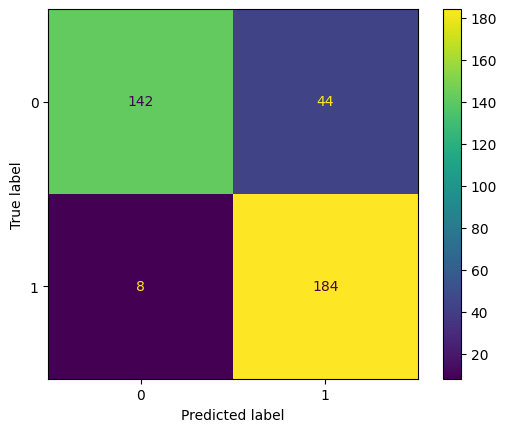

In [67]:
print(classification_report(test['Label'],y_pred))
print(ConfusionMatrixDisplay.from_predictions(test['Label'],y_pred))